In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:


data = pd.read_csv("day.csv") # Mention the path of the dataset, in my case i have my dataset in same directory
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
data.shape

(730, 16)

In [4]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
data.info() #From the output below it is clear that therre arent any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data.isna().sum() # The output below confirms that there are no null values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# First of all we will try and fix some columns and then maybe we can decided which columns to drop based on our observations
# We will round of some columns which consists of float data to 2 decimals just to clean the data a little

In [8]:
cols_to_roundoff = data.columns[data.dtypes == float].values
cols_to_roundoff
    

array(['temp', 'atemp', 'hum', 'windspeed'], dtype=object)

In [9]:
data[cols_to_roundoff] = round(data[cols_to_roundoff],2)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


### Now let's convert some numerics to categorical variable for ease of understanding
- For the column season we have the following replacements:
    - season (1:spring, 2:summer, 3:fall, 4:winter)

In [10]:
data.season = data.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

In [11]:
rand_data = data[["dteday"]]
rand_data

,dteday
0,01-01-2018
1,02-01-2018
2,03-01-2018
3,04-01-2018
4,05-01-2018
...,...
725,27-12-2019
726,28-12-2019
727,29-12-2019
728,30-12-2019


In [12]:
pd.to_datetime(rand_data["dteday"], dayfirst = True).dt.dayofweek


0      0
1      1
2      2
3      3
4      4
      ..
725    4
726    5
727    6
728    0
729    1
Name: dteday, Length: 730, dtype: int64

### We found some anomaly in weekday, the numbers a bit tricky to identify as the correct encoding for the numbers in the weekday isnt specified

### From the results above we can infer the encodings of weekdays as follows:
- 0 : "Tuesday", 1 : "Wednesday", 2 : "Thursday", 3 : "Friday", 4 : "Saturday, 5 : "Sunday", 6 : "Monday", this is the case for some of the dates, in other dates along dtday, the day is shifted one step ahead, enconding 0 as Monday till 6 as Sunday 

Since the dteday isnt a date time object, we will convert this into one and from there we will extract the day of the week, so as to avoid incorrect assumptions 

According to the documentation : https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.weekday.html we will take Monday as 0 Tuesday as 1, Wednesday as 2, Thursday as 3, Friday as 4, Saturday as 5 and Sunday as 6 

 
    

In [17]:
data["weekday"] = pd.to_datetime(data["dteday"], dayfirst = True).dt.dayofweek

### Since we took care of the anomaly in the weekday column now we will focus on "month" and "weathersit"

### The "month" columns is easy to convert into a categorical variable with the help of dteday but we need one adjective to describe the weather condition in "weathersit"

### According to the data dictionary provided to us, following is the description of numeics in "weathersit"

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

### From the description above we can coin our own adjectives;
- 1 : Ideal
- 2 : Moderate
- 3 : Bad
- 4 : Severe


In [19]:
data["mnth"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [21]:
data["mnth"] = data["mnth"].map({1 : "January", 2 : "February", 3 : "March", 4 : "April", 5 : "May", 6 : "June", 7: "July",
                 8 : "August", 9 : "September", 10 : "October", 11 : "November", 12 : "December"})

In [23]:
data["weathersit"] = data["weathersit"].map({1 : "Ideal", 2 : "Moderate", 3 : "Bad", 4 : "Severe"})

### Since we fixed and performed operations deemed appropriate, now we will focus on selecting the features we need and dropping those which are redundant or of no use

In [24]:
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,January,0,0,0,Moderate,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,spring,0,January,0,1,0,Moderate,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,spring,0,January,0,2,1,Ideal,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,spring,0,January,0,3,1,Ideal,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,spring,0,January,0,4,1,Ideal,9.31,11.46,43.70,12.52,82,1518,1600


### After observing the columns and their values we have decided to exclude the follwing columns from our model

- instant : This is just the record number and clearly is of no use
- dteday : Most of the information from this column have been derived in other columns, so this holds little to no value and would be redundant
- casual & registered : We will assume we dont know these values while the model predicts on new data and our target value is simply the sum of these two columns so when we include these in our model, the model will memorize these value and fail to generalize on the given data, in simple term these two values will leak information of our targeted variable



In [27]:
cols_to_drop = ["instant", "dteday", "casual", "registered"]
print("Shape of data before dropping the columns", data.shape)
data.drop(cols_to_drop, axis = 1,inplace = True)
print("Shape of data after dropping the columns", data.shape)

Shape of data before dropping the columns (730, 16)
Shape of data after dropping the columns (730, 12)


In [28]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,0,0,Moderate,14.11,18.18,80.58,10.75,985
1,spring,0,January,0,1,0,Moderate,14.90,17.69,69.61,16.65,801
2,spring,0,January,0,2,1,Ideal,8.05,9.47,43.73,16.64,1349
3,spring,0,January,0,3,1,Ideal,8.20,10.61,59.04,10.74,1562
4,spring,0,January,0,4,1,Ideal,9.31,11.46,43.70,12.52,1600


In [36]:
print(f"The mean of 'temp' is {np.mean(data['temp'])} and that of 'atemp' is {np.mean(data['atemp'])}" )

The mean of 'temp' is 20.319328767123267 and that of 'atemp' is 23.7263835616438


#### We can observe that "temp" and "atemp" have similar values
- Their means are quite close 
- We will keep them for now and analyse them during our visualization

## Data Visualisation
 - Checking outliers
 - identifying some collinearity

### Since we have only 4 columns to check for outliers we can do so in a single cell
- We will plot a boxplot for the following columns
    - [temp, atemp, hum, windspeed]

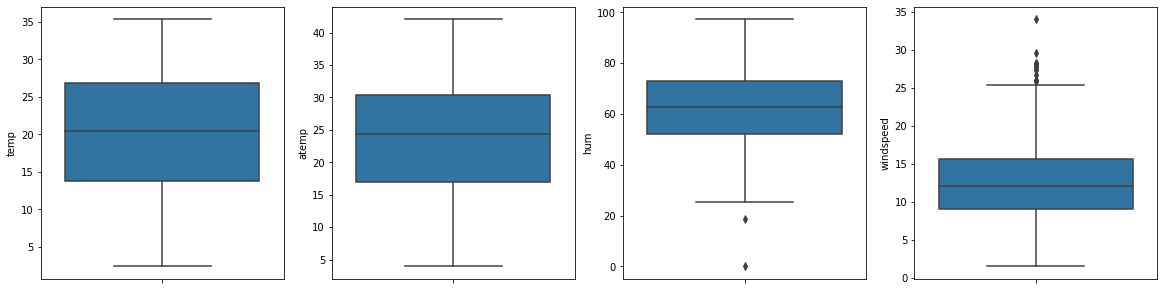

In [48]:
boxplot_cols = ["temp", "atemp", "hum", "windspeed"]


for i,j in enumerate(boxplot_cols):
    plt.subplot(1,4,i+1)
    sns.boxplot(data = data, y = j)
    plt.gcf().set_size_inches(20,5)

## Observations;
- We dont seem to have annoying outliers although we seem to have some in windspeed but we cannot do anything about cause the windspeed will depend upon the nature of the weather
- We will see if this at all affects our model during our model building

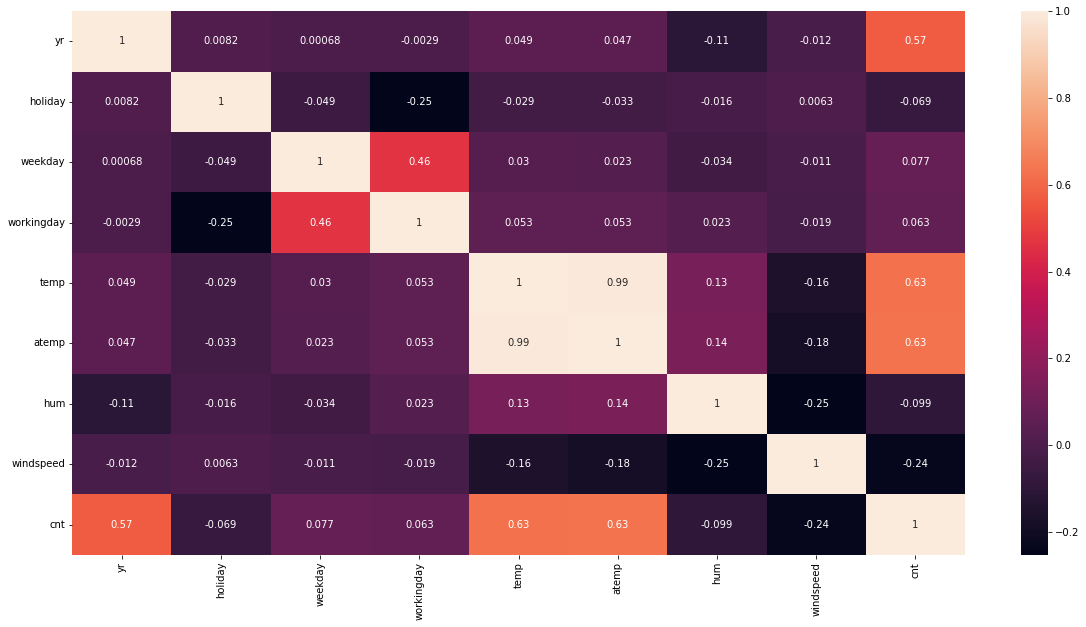

In [54]:
sns.heatmap(data = data.corr(), annot = True)
plt.gcf().set_size_inches(20,10)

## Observations :
- We can see that temp and atemp have atemp have the highest correlation almost equal to 1, so we can drop atemp since this column indicates the how the temp feels like compared to actual temp, this could be different with different people
- Also the column yr seems to be moderately(positive) correlated with our targeted variable

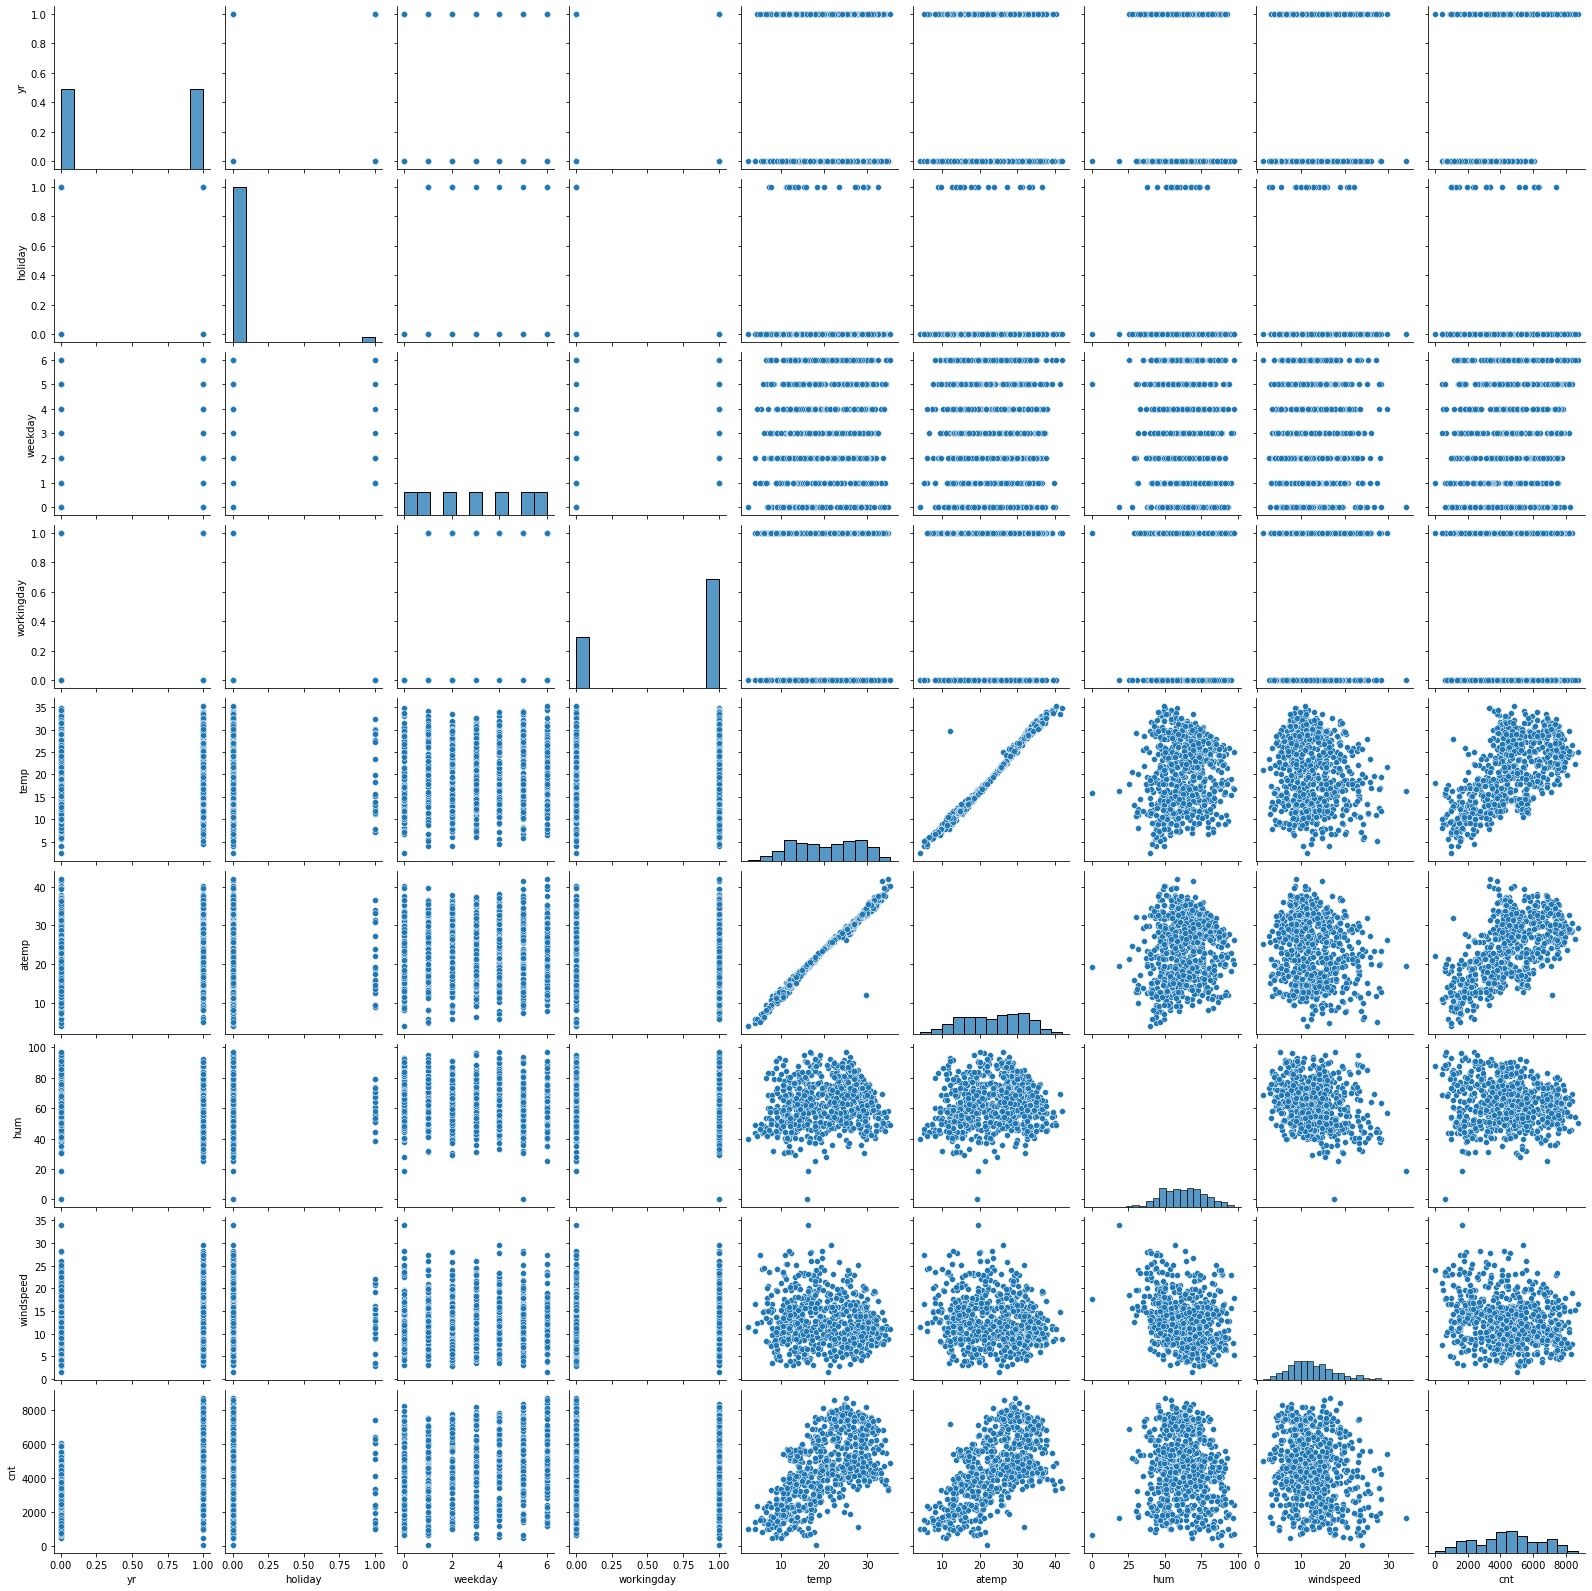

In [55]:
sns.pairplot(data = data)


## Observations : 
- We find some collinearity with temp vs cnt
- We can conclude that there exist some collinearity 